<a href="https://colab.research.google.com/github/caioeserpa/Estudos_DS_Academy/blob/main/%5BPYFUN%5D_CAP09_An%C3%A1lise_Explorat%C3%B3ria_de_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória de Dados

Neste notebook usaremos uma pesquisa recente nos EUA sobre o mercado de trabalho para programadores de software. Nosso objetivo é fazer uma investigação inicial dos dados a fim de detectar problemas com os dados, necessidade de mais variáveis, falhas na organização e necessidade de transformação.

Pesquisa salarial realizada pelo site [Free code Camp](https://www.freecodecamp.com/) com Programadores de software nos EUA que frequentam treinamentos Bootcamp.


In [ ]:
#Importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
#Carregando o dataset
df = pd.read_csv('Dados-Pesquisa.csv', sep = ',', low_memory=False)

In [ ]:
print(df.head())

    Age  AttendedBootcamp  ...              SchoolMajor  StudentDebtOwe
0  28.0               0.0  ...                      NaN         20000.0
1  22.0               0.0  ...                      NaN             NaN
2  19.0               0.0  ...                      NaN             NaN
3  26.0               0.0  ...  Cinematography And Film          7000.0
4  20.0               0.0  ...                      NaN             NaN

[5 rows x 113 columns]


In [ ]:
df

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,Gender,HasChildren,HasDebt,HasFinancialDependents,...,PodcastHanselminutes,PodcastJSJabber,PodcastJsAir,PodcastNone,PodcastOther,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodeWars,ResourceCodecademy,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,United States of America,United States of America,office and administrative support,NaN,Employed for wages,NaN,NaN,0.0,male,0.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,United States of America,United States of America,food and beverage,NaN,Employed for wages,NaN,50000.0,NaN,male,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,Front-end happy hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,United States of America,United States of America,finance,NaN,Employed for wages,NaN,NaN,NaN,male,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,45.0,United States of America,United States of America,"arts, entertainment, sports, or media",NaN,Employed for wages,NaN,65000.0,NaN,female,NaN,1.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,United States of America,United States of America,education,NaN,Employed for wages,NaN,45000.0,NaN,female,NaN,1.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,39.0,0.0

In [ ]:
print(df.describe()) #describe mostra um resumo estatístico do dataset

                Age  AttendedBootcamp  ...  ResourceYouTube  StudentDebtOwe
count  13613.000000      15380.000000  ...            121.0     3514.000000
mean      29.175714          0.061964  ...              1.0    34556.143711
std        9.017580          0.241097  ...              0.0    54423.139781
min       10.000000          0.000000  ...              1.0        0.000000
25%       23.000000          0.000000  ...              1.0    10000.000000
50%       27.000000          0.000000  ...              1.0    20000.000000
75%       33.000000          0.000000  ...              1.0    40000.000000
max       86.000000          1.000000  ...              1.0  1000000.000000

[8 rows x 85 columns]


In [ ]:
#LISTANDO COLUNAS
list(df)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

#Distribuição de Idade

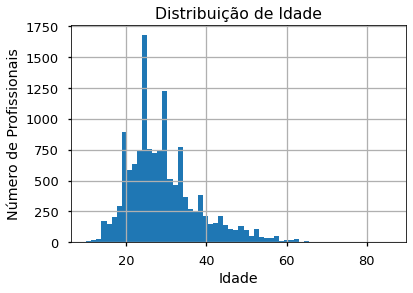

In [ ]:
#A maioria dos profissionais que trabalham como programadores de software estão na faixa de idade entre 20 e 30 anos, sendo 25 anos a idade mais frequentes

#Gerando um histograma
df.Age.hist(bins =60)
plt.xlabel('Idade')
plt.ylabel('Número de Profissionais')
plt.title('Distribuição de Idade')
plt.show()

# Distribuição por Salário Postado

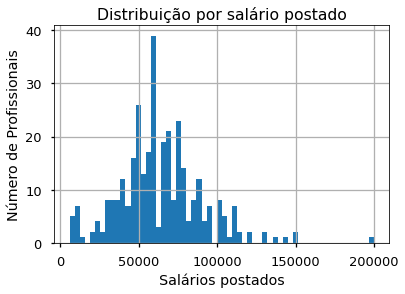

In [ ]:
#A maioria dos profissionais que postaram os salários recebem acima de 50000 dólares anuais

df.BootcampPostSalary.hist(bins =60) #bins é a quantidade de caixnha
plt.xlabel('Salários postados')
plt.ylabel('Número de Profissionais')
plt.title('Distribuição por salário postado')
plt.show()

# Distribuição por Sexo

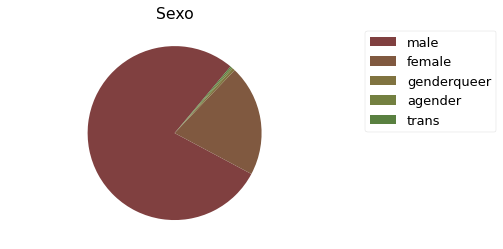

In [ ]:
#A grande maioria dos programados são do sexo masculino

#Definindo a quantidade
label = df.Gender.value_counts().index #label vai receber a quantidade de valores que existem no index
num = len(df.EmploymentField.value_counts().index) #calculando a quantidade para cada label

#Criando a lista de cores
ListaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
ListaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), ListaHSV))

#Gráfico de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors= ListaRGB, startangle = 50) #definindo as cores que irão receber o rgb
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, label, bbox_to_anchor = (1.05,1))
plt.title('Sexo')
plt.show()

#Distribuição de Interesses

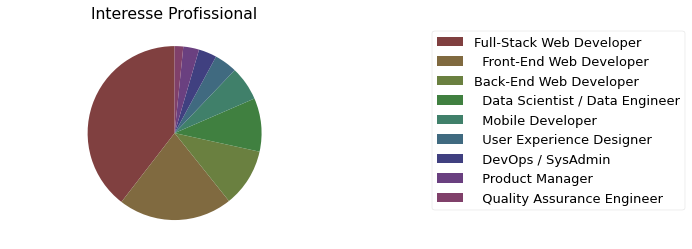

In [ ]:
#Quais são os principais interesses dos participantes da pesquisa?
#O principal interesse profissional dos programadores é desenvolvimento Web(Full-Stack, Front-End e Back-End)
#Segundo Data Science

#Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index) #coletando a quantidade de elemento a partir do índice

#Criando a lista de cores

ListaHSV = [(x*1.0/num,0.5,0.5) for x in range(num)]
ListaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), ListaHSV))
labels = df.JobRoleInterest.value_counts().index #extraindo nome que temos apra interesse de emprego
colors = [' OliveDrab', 'Orange', 'OrangeRed','DakCyan','Salmon','Sienna','Maroon','LighSlateGrey','DisGray' ]

#Gráfico de Pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors = ListaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25,1))
plt.title('Interesse Profissional')
plt.show()



#Distribuição de Empregabilidade


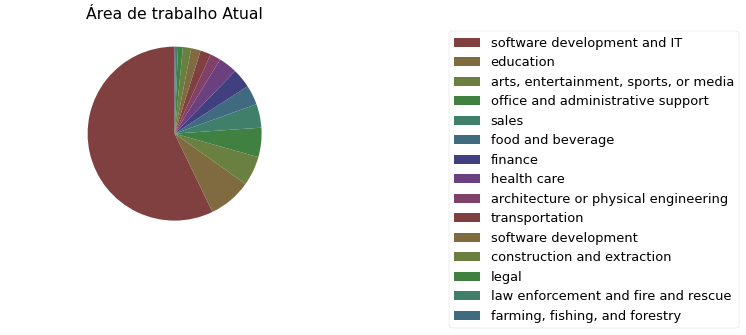

In [ ]:
#Quais as áreas de negócios em que os participantes da pesquisa trabalham?
#A maioria dos programadores trabalham na área de desenvolvimento de Software e TI, mas outras áreas como finanças
#e saúde também são significativas.

#Definindo a quantidade
num = len(df.EmploymentField.value_counts().index) #contando quantos valores tem

#Criando lista de cores
ListaHSV = [(x*1.0/num,0.5,0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), ListaHSV))
labels = df.EmploymentField.value_counts().index #pegando valores

#Gráfico Pizza
fatias, texto = plt.pie(df.EmploymentField.value_counts(), colors = ListaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.3,1))
plt.title('Área de trabalho Atual')
plt.show()

#Preferências de Trabalho Por Idade

Text(0, 0.5, 'Quantidade')

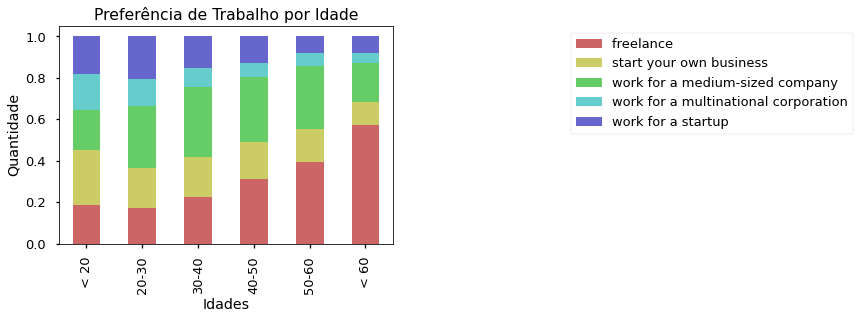

In [ ]:
#Quais são as preferências de trabalho por idade?
#Percebe que à medida que a idade aumenta, o interesse por trabalho
#freelance também aumenta, sendo o modelo preferido por profissionais acima de 60 anos.
#Profissionais mais jovens preferem trabalhar em Startups ou no seu próprio negócio. Profissionais entre 20 e 50 anos
#preferem trabalhar em empresas de tamanho médio.

#Agrupando os dados
df_ageranges = df.copy() #copiando o data frame
bins = [0, 20, 30, 40, 50, 60, 100]

df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'],
                                   bins,
                                   labels = ['< 20', '20-30', '30-40', '40-50', '50-60', '< 60']) #criando uma coluna e agrupando os dados por idade

df2 = pd.crosstab(df_ageranges.AgeRanges,
                  df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1) #tabela cruzada com

#Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index) #contando quantas idades possuem (valores)

#Criando a lista de cores

ListaHSV = [(x*1.0/num, 0.5, 0.8) for x in range(num)]
ListaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), ListaHSV))

#Gráfico de barras (stacked)

ax1 = df2.plot(kind = 'bar', stacked = True, color = ListaRGB, title = 'Preferência de Trabalho por Idade')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51,1))
plt.xlabel('Idades')
plt.ylabel('Quantidade')


In [ ]:
#help crosstab
#help mostra o que a função faz. Pivor faz uma inversão de perspectiva nos dados;

help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

## Realocação por Idade

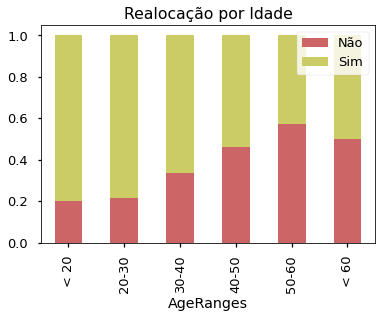

In [ ]:
#Qual o objetivo de realocação?
#A vontade de buscar um novo emprego diminui com a idade.
#Quando 80% das pessoas abaixo dos 30 estão preparados para isso.

#Agrupand os dados
df3 = pd.crosstab(df_ageranges.AgeRanges,
                  df_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1) #cruzando o range de idade com o 
                  #job realocate SIM NÃO

#Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

#Criando a lista de cores

ListaHSV = [(x*1.0/num, 0.5, 0.8) for x in range(num)]
ListaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), ListaHSV))

#Gráfico de Barras (stacked)
ax1 = df3.plot(kind = 'bar', stacked = True, color = ListaRGB, title = 'Realocação por Idade')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,['Não','Sim'], loc = 'best')

## Idade x Horas de Aprendizagem

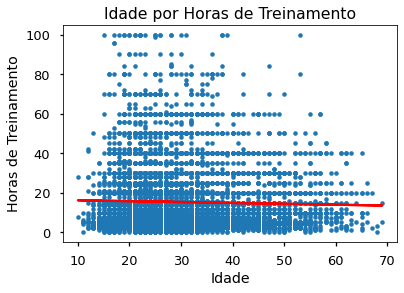

In [ ]:
#Qual a relação entre idade e horas de aprendizagem?
#A idade dos profissionais não afeta a quantidade de tempo gasto com capacitação e treinamento

import warnings
warnings.filterwarnings('ignore')

#Criando subset de dados
df9 = df.copy() #criando uma copia  
df9 = df9.dropna(subset=['HoursLearning']) #removendo os registros NA na coluna Hours Learning
df9 = df9[df['Age'].isin(range(0,70))] # atualizando a coluna Age para range de 0 até 70


#Definindo os valores de x e y
x = df9.Age 
y = df9.HoursLearning

#Computando os valores e gerando o gráfico

m, b = np.polyfit(x, y, 1) #linha regressão
plt.plot(x, y, '.')
plt.plot(x, m*x +b, '-', color ='red')
plt.xlabel('Idade')
plt.ylabel('Horas de Treinamento')
plt.title('Idade por Horas de Treinamento')
plt.show()

## Investimento em Capacitação x Expectativa Salarial

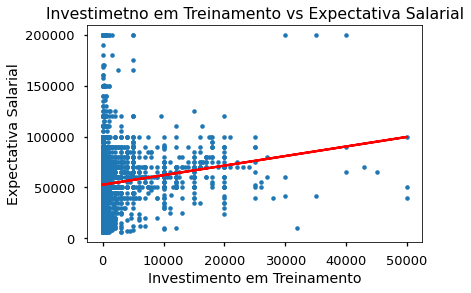

In [ ]:
#Qual a relação entre investimento em capacitação e expectativa salarial?
#Os profissionais que investem tempo e dinheiro em capacitação e treinamento, em geral
#conseguem salários mais altos, embora alguns profissionais
#esperem altos salários, investindo 0 em treinamento.

import warnings
warnings.filterwarnings('ignore')

#Criando subset dos dados
df5 = df.copy()
df= df5.dropna(subset=['ExpectedEarning'])
df5 = df5[df['MoneyForLearning'].isin(range(0,60000))]

#Definindo os valores de x e y
x = df5.MoneyForLearning
y = df5.ExpectedEarning

#computando os valores e gerando o gráfico

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x ,m*x + b, 'b', color = 'red')
plt.xlabel('Investimento em Treinamento')
plt.ylabel('Expectativa Salarial')
plt.title('Investimetno em Treinamento vs Expectativa Salarial')
plt.show()